<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/Bordas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [24, 8]

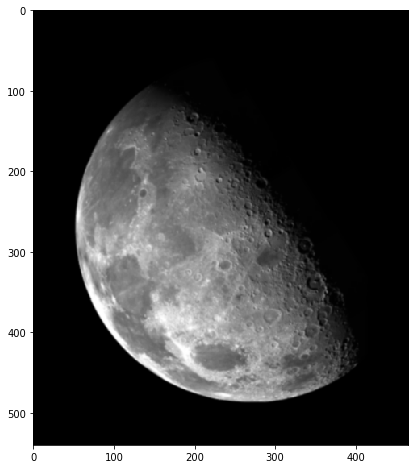

In [0]:
moon = cv2.imread('blurry_moon.tif', cv2.IMREAD_GRAYSCALE)
altura, largura = moon.shape
plt.imshow(moon, cmap='gray')

##Filtro da Mediana
Imagem: blurry moon

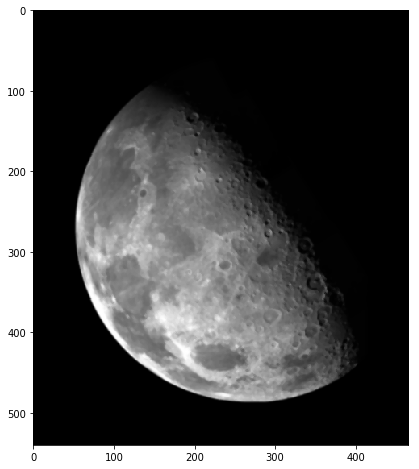

In [0]:
m = 3
borda = (m-1)//2
moon_mediana = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = moon[x-borda:x+borda+1,y-borda:y+borda+1]
    moon_mediana[x,y] = np.median(janela)
    
moon_mediana[moon_mediana > 255] = 255
moon_mediana[moon_mediana < 0] = 0
    
plt.imshow(moon_mediana, cmap='gray')

##Detecção de borda (Sobel)
Imagem: blurry moon

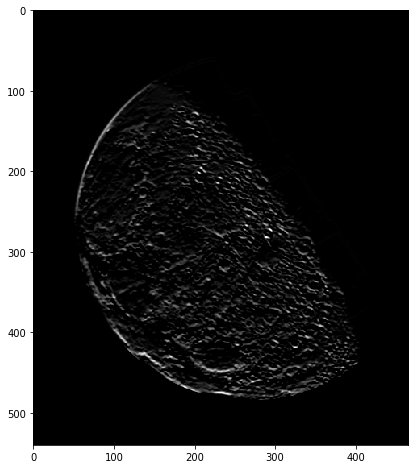

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, -2, -1],
                 [0,   0,  0],
                 [1,  2,  1]])
dx = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = moon[x-borda:x+borda+1,y-borda:y+borda+1]
    dx[x,y] = np.sum(kernel*janela)
    
dx[dx > 255] = 255
dx[dx < 0] = 0
    
plt.imshow(dx, cmap='gray')

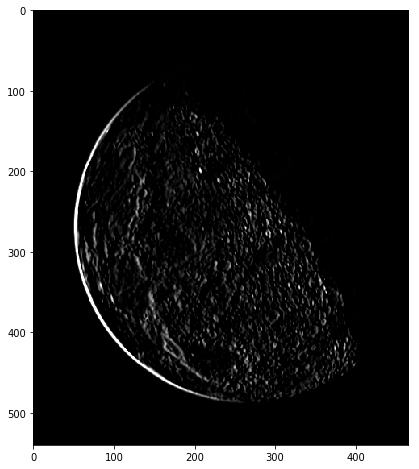

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, 0, 1],
                 [-2,  0,  2],
                 [-1,  0,  1]])
dy = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = moon[x-borda:x+borda+1,y-borda:y+borda+1]
    dy[x,y] = np.sum(kernel*janela)
    
dy[dy > 255] = 255
dy[dy < 0] = 0
    
plt.imshow(dy, cmap='gray')

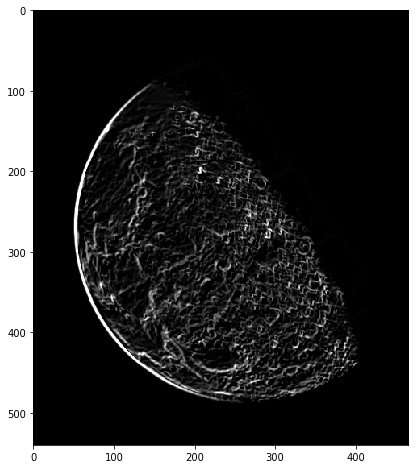

In [0]:
magnitude = np.abs(dx) + np.abs(dy)
magnitude[magnitude > 255] = 255
magnitude[magnitude < 0] = 0

plt.imshow(magnitude, cmap='gray')

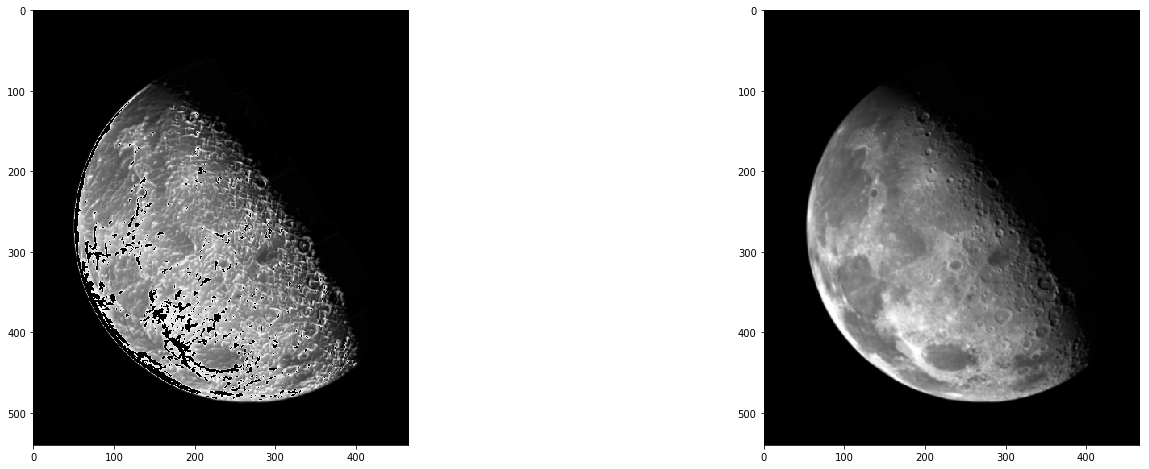

255.0
0.0


In [0]:
g = moon + magnitude

g[g > 255] = 0
g[g < 0] = 0

plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(moon, cmap='gray')

plt.show()

##Detecção de Borda (Laplace)

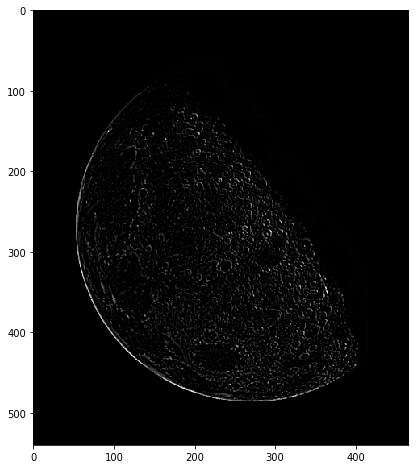

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]])
moon_laplace = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = moon[x-borda:x+borda+1,y-borda:y+borda+1]
    moon_laplace[x,y] = np.sum(kernel*janela)
    
moon_laplace[moon_laplace > 255] = 255
moon_laplace[moon_laplace < 0] = 0
    
plt.imshow(np.abs(moon_laplace), cmap='gray')

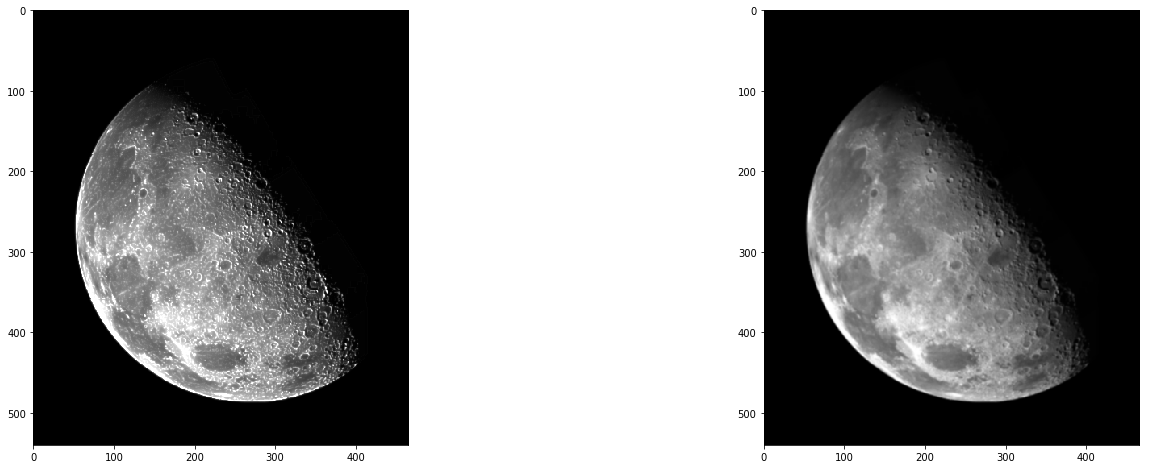

In [0]:
g = moon + np.abs(moon_laplace)

g[g > 255] = 255
g[g < 0] = 0

plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(moon, cmap='gray')

plt.show()

##Filtro Mediana
Circuito

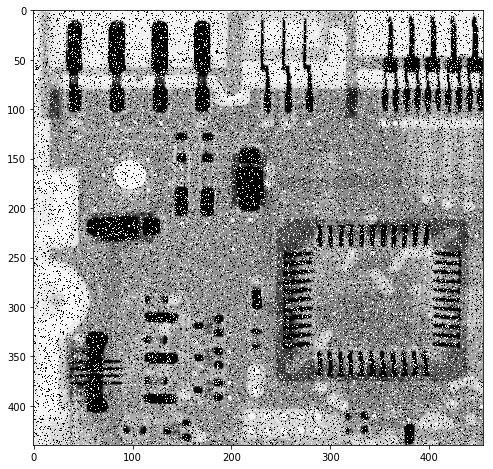

In [0]:
ckt = cv2.imread('ckt_board.tif', cv2.IMREAD_GRAYSCALE)
altura, largura = ckt.shape
plt.imshow(ckt, cmap='gray')

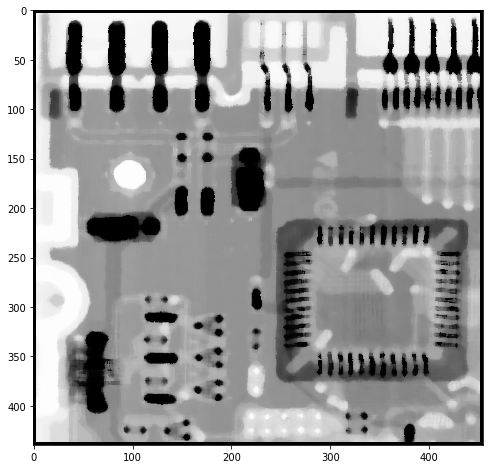

In [0]:
m = 7
borda = (m-1)//2
ckt_mediana = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = ckt[x-borda:x+borda+1,y-borda:y+borda+1]
    ckt_mediana[x,y] = np.median(janela)
    
ckt_mediana[ckt_mediana > 255] = 255
ckt_mediana[ckt_mediana < 0] = 0
    
plt.imshow(ckt_mediana, cmap='gray')

##Esqueleto

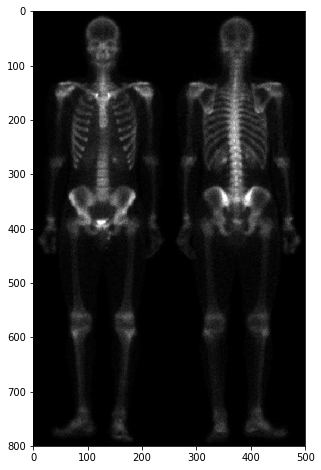

In [0]:
skeleton = cv2.imread('skeleton_orig.tif', cv2.IMREAD_GRAYSCALE)
altura, largura = skeleton.shape
plt.imshow(skeleton, cmap='gray')

##Detecção de Borda

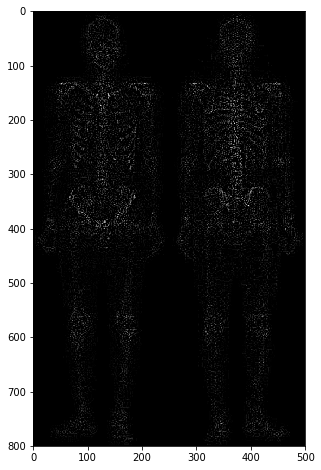

In [0]:
m = 3
borda = (m-1)//2
kernel = np.array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]])
skeleton_laplace = np.zeros((altura,largura))

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):
    janela = skeleton[x-borda:x+borda+1,y-borda:y+borda+1]
    skeleton_laplace[x,y] = np.sum(kernel*janela)
    
skeleton_laplace[skeleton_laplace > 255] = 255
skeleton_laplace[skeleton_laplace < 0] = 0
    
plt.imshow(np.abs(skeleton_laplace), cmap='gray')

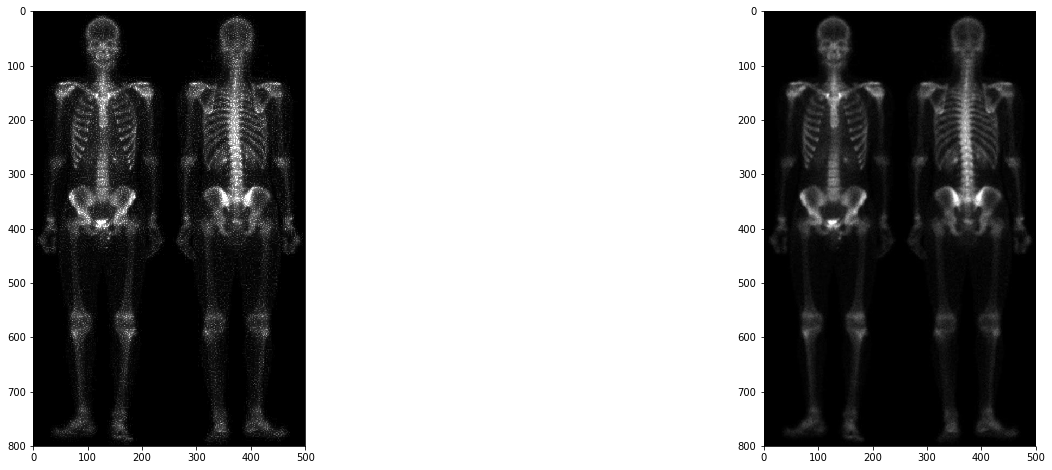

In [0]:
g = skeleton + np.abs(skeleton_laplace)

g[g > 255] = 255
g[g < 0] = 0

plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(skeleton, cmap='gray')

plt.show()